In [5]:
import pandas as pd
import requests
import pandas_datareader as pdr
from datetime import datetime

In [6]:
! pip install pycoingecko
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [7]:
ohlc = cg.get_coin_ohlc_by_id(
    id="bitcoin", vs_currency="usd", days="30"
)
ohlc_df = pd.DataFrame(ohlc)
ohlc_df.columns = ["date", "open", "high", "low", "close"]
ohlc_df["date"] = pd.to_datetime(ohlc_df["date"], unit="ms")
ohlc_df

,date,open,high,low,close
0,2023-08-19 20:00:00,26100.0,26117.0,26100.0,26117.0
1,2023-08-20 00:00:00,26116.0,26116.0,26049.0,26049.0
2,2023-08-20 04:00:00,26105.0,26178.0,26049.0,26085.0
3,2023-08-20 08:00:00,26098.0,26105.0,26061.0,26061.0
4,2023-08-20 12:00:00,26080.0,26142.0,26080.0,26142.0
...,...,...,...,...,...
176,2023-09-18 04:00:00,26521.0,26676.0,26457.0,26676.0
177,2023-09-18 08:00:00,26666.0,26666.0,26624.0,26660.0
178,2023-09-18 12:00:00,26696.0,27129.0,26696.0,27129.0
179,2023-09-18 16:00:00,27180.0,27395.0,27180.0,27266.0


In [8]:
df=ohlc_df.reset_index()['close']
df

0      26117.0
1      26049.0
2      26085.0
3      26061.0
4      26142.0
        ...   
176    26676.0
177    26660.0
178    27129.0
179    27266.0
180    27267.0
Name: close, Length: 181, dtype: float64

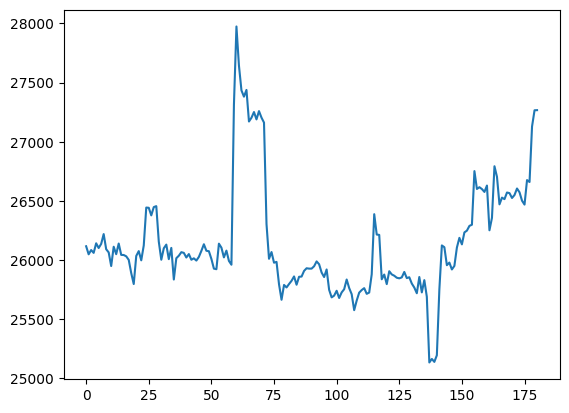

In [9]:
import matplotlib.pyplot as plt
plt.plot(df)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
df

array([[0.34589644],
       [0.32194435],
       [0.33462487],
       [0.32617119],
       [0.35470236],
       [0.34061289],
       [0.35294118],
       [0.38217682],
       [0.33709052],
       [0.32758013],
       [0.28707291],
       [0.3444875 ],
       [0.32229658],
       [0.35399789],
       [0.32018316],
       [0.31983093],
       [0.31595632],
       [0.30538922],
       [0.26593871],
       [0.23353293],
       [0.31701303],
       [0.33145474],
       [0.30398027],
       [0.3483621 ],
       [0.46107784],
       [0.46037337],
       [0.43783022],
       [0.46248679],
       [0.46530468],
       [0.35963367],
       [0.30574146],
       [0.33990842],
       [0.35082776],
       [0.30750264],
       [0.34096513],
       [0.24691793],
       [0.31032054],
       [0.31771751],
       [0.32828461],
       [0.32617119],
       [0.31243396],
       [0.32264882],
       [0.30574146],
       [0.3099683 ],
       [0.3032758 ],
       [0.31419514],
       [0.33215921],
       [0.351

In [13]:
# spliting dataset into train and test split
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:], df[training_size:len(df),:1]

In [14]:
training_size,test_size

(117, 64)

In [15]:
len(train_data), len(test_data)

(117, 64)

In [16]:
import numpy
# convert an array of values into  a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-time_step-1):   ## i=0,1,2,3...
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX) , numpy.array(dataY)

In [17]:
# reshape into X=t, t+1, t+2 and Y= t+4
time_step=20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest= create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(96, 20)
(96,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(43, 20)
(43,)


(None, None)

In [20]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [21]:
X_train, X_test

(array([[[0.34589644],
         [0.32194435],
         [0.33462487],
         ...,
         [0.30538922],
         [0.26593871],
         [0.23353293]],
 
        [[0.32194435],
         [0.33462487],
         [0.32617119],
         ...,
         [0.26593871],
         [0.23353293],
         [0.31701303]],
 
        [[0.33462487],
         [0.32617119],
         [0.35470236],
         ...,
         [0.23353293],
         [0.31701303],
         [0.33145474]],
 
        ...,
 
        [[0.29235646],
         [0.26769989],
         [0.2543149 ],
         ...,
         [0.21556886],
         [0.22120465],
         [0.20429729]],
 
        [[0.26769989],
         [0.2543149 ],
         [0.27685805],
         ...,
         [0.22120465],
         [0.20429729],
         [0.20817189]],
 
        [[0.2543149 ],
         [0.27685805],
         [0.21627334],
         ...,
         [0.20429729],
         [0.20817189],
         [0.26241634]]]),
 array([[[0.37971117],
         [0.2476224 ],
         

In [22]:
## Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(40,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(40,return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 40)            6720      
                                                                 
 lstm_1 (LSTM)               (None, 20, 40)            12960     
                                                                 
 lstm_2 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 32681 (127.66 KB)
Trainable params: 32681 (127.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
X_train[:96]

array([[[0.34589644],
        [0.32194435],
        [0.33462487],
        ...,
        [0.30538922],
        [0.26593871],
        [0.23353293]],

       [[0.32194435],
        [0.33462487],
        [0.32617119],
        ...,
        [0.26593871],
        [0.23353293],
        [0.31701303]],

       [[0.33462487],
        [0.32617119],
        [0.35470236],
        ...,
        [0.23353293],
        [0.31701303],
        [0.33145474]],

       ...,

       [[0.29235646],
        [0.26769989],
        [0.2543149 ],
        ...,
        [0.21556886],
        [0.22120465],
        [0.20429729]],

       [[0.26769989],
        [0.2543149 ],
        [0.27685805],
        ...,
        [0.22120465],
        [0.20429729],
        [0.20817189]],

       [[0.2543149 ],
        [0.27685805],
        [0.21627334],
        ...,
        [0.20429729],
        [0.20817189],
        [0.26241634]]])

In [45]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=20,verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 199ms/step - loss: 0.0272 - val_loss: 0.0190
Epoch 2/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0268 - val_loss: 0.0201
Epoch 3/100
5/5 [==============================] - 0s 94ms/step - loss: 0.0258 - val_loss: 0.0209
Epoch 4/100
5/5 [==============================] - 0s 91ms/step - loss: 0.0253 - val_loss: 0.0219
Epoch 5/100
5/5 [==============================] - 0s 96ms/step - loss: 0.0247 - val_loss: 0.0209
Epoch 6/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0239 - val_loss: 0.0177
Epoch 7/100
5/5 [==============================] - 0s 55ms/step - loss: 0.0223 - val_loss: 0.0190
Epoch 8/100
5/5 [==============================] - 0s 51ms/step - loss: 0.0215 - val_loss: 0.0186
Epoch 9/100
5/5 [==============================] - 0s 46ms/step - loss: 0.0198 - val_loss: 0.0181
Epoch 10/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0189 - val_loss: 0.0177
Epoch 11/100
5/5 [

In [46]:
import tensorflow as tf

In [28]:
tf.__version__

'2.13.0'

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [48]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:
!pip install scikit-learn

In [50]:
import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [51]:
from sklearn.metrics import mean_squared_error

from math import sqrt

math.sqrt(mean_squared_error(y_train, train_predict))

26147.691135656594

In [52]:
# from sklearn.metrics import mean_squared_error

# from math import sqrt
math.sqrt(mean_squared_error(ytest,test_predict))

26245.723252658692

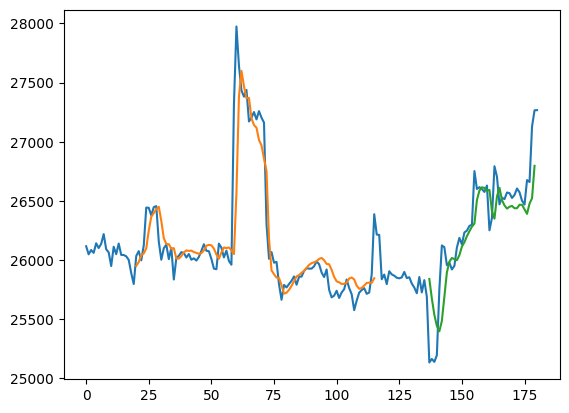

In [53]:

look_back=20
trainPredictPlot= np.empty_like(df)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back: len(train_predict)+look_back,:]= train_predict
testPredictPlot=numpy.empty_like(df)
testPredictPlot[:,:]= numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :]= test_predict
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
len(test_data)

64

In [56]:
x_input=test_data[14:].reshape(1,-1)
x_input.shape

(1, 50)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.22296583303980277,
 0.2060584712927085,
 0.25431489961253995,
 0.2085241282141599,
 0.24515674533286358,
 0.19549137020077545,
 0.0,
 0.01056710109193304,
 0.0017611835153221733,
 0.02148643888693158,
 0.21697780908770703,
 0.3483620993307497,
 0.34307854878478317,
 0.2895385699189852,
 0.2972877773864031,
 0.2768580486086645,
 0.2874251497005993,
 0.3420218386755902,
 0.370905248326876,
 0.3515322296583303,
 0.38710813666784105,
 0.39239168721380757,
 0.40648115533638496,
 0.4100035223670311,
 0.5695667488552303,
 0.5163790066924978,
 0.5216625572384643,
 0.5160267699894323,
 0.5075730891158852,
 0.5265938710813671,
 0.3934483973230005,
 0.4304332511447697,
 0.5840084536808732,
 0.552659387108136,
 0.47058823529411775,
 0.4906657273687909,
 0.4860866502289536,
 0.505811905600563,
 0.5040507220852408,
 0.48960901725959793,
 0.4984149348362088,
 0.5177879535047545,
 0.5065163790066922,
 0.4815075730891163,
 0.4698837618879885,
 0.5427967594223322,
 0.5371609721733002,
 0.702359985910

In [60]:
from numpy import array

lst_output=[]
n_steps=50
i=0;
while(i<10):
  if(len(temp_input)>50):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day output{}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input= x_input.reshape((1,n_steps,1))
    yhat= model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

0 day input [0.44482443 0.44482443 0.44482443 0.44482437 0.44482443 0.44482443
 0.44482437 0.4448244  0.4448244  0.44482437 0.44482434 0.44482437
 0.44482437 0.44482431 0.44482431 0.44482428 0.44482431 0.44482431
 0.44482434 0.44482431 0.44482434 0.44482437 0.44482443 0.4448244
 0.44482443 0.44482443 0.44482443 0.44482443 0.44482443 0.44482443
 0.44482446 0.44482443 0.44482437 0.44482437 0.44482437 0.44482437
 0.44482437 0.44482431 0.44482431 0.44482434 0.44482431 0.44482431
 0.44482434 0.44482428 0.44482428 0.44482431 0.44482428 0.44482428
 0.44482431 0.44482431]
0 day output[[0.4448243]]
1 day input [0.44482443 0.44482443 0.44482437 0.44482443 0.44482443 0.44482437
 0.4448244  0.4448244  0.44482437 0.44482434 0.44482437 0.44482437
 0.44482431 0.44482431 0.44482428 0.44482431 0.44482431 0.44482434
 0.44482431 0.44482434 0.44482437 0.44482443 0.4448244  0.44482443
 0.44482443 0.44482443 0.44482443 0.44482443 0.44482443 0.44482446
 0.44482443 0.44482437 0.44482437 0.44482437 0.44482437 

In [61]:
day_new=np.arange(1,51)
day_pred=np.arange(51,61)

In [62]:
import matplotlib.pyplot as plt


In [63]:
len(df)

181

In [64]:
df3=df.tolist()
df3.extend(lst_output)

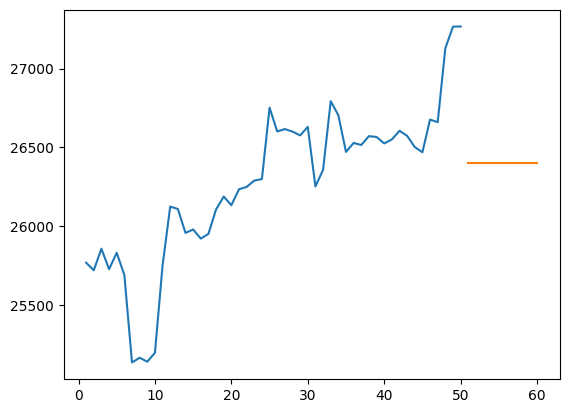

In [65]:
plt.plot(day_new,scaler.inverse_transform(df[131:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))